In [1]:
import json
def dumpjson(data,filename):
    with open(filename, 'w+') as f:
        json.dump(data, f)
def loadjson(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update({'font.size': 14,'font.family': 'Times New Roman','axes.labelsize': 14,'axes.titlesize': 14,'xtick.labelsize': 12,'ytick.labelsize': 12,'mathtext.fontset':'stix'})

def plot_array_data(data_array, category_array,title, x_labels, y_labels, x_label, y_label, marker_size = 5, marker_width =1,alpha=1, figsize=(5, 5), fontsize=12, max_circle_size=1000):
    """
    Plot a 2D array with circles whose area is proportional to the value, 
    'x' markers for True values, and nothing for null values.
    Circles are colored according to a category array with values 'A', 'B', 'C'.
    
    Parameters:
    -----------
    data_array : 2D numpy array or nested list
        Values can be numeric, True, or None/np.nan
    category_array : 2D numpy array or nested list
        Values can be 'A', 'B', 'C', or None/np.nan
    x_labels : list
        Labels for x-axis ticks
    y_labels : list
        Labels for y-axis ticks
    figsize : tuple, optional
        Figure size (width, height)
    max_circle_size : float, optional
        Maximum size for circles
    """
    # Convert inputs to numpy arrays if they aren't already
    data = np.array(data_array, dtype=object)
    categories = np.array(category_array, dtype=object)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define colors for categories
    category_colors = {'GGA': 'C0', 'HSE': 'C1', 'ML': 'C2','Total': 'C3'}
    
    # Get the shape of the data
    rows, cols = data.shape
    
    # Find the maximum numeric value for scaling circles
    numeric_values = []
    for i in range(rows):
        for j in range(cols):
            if isinstance(data[i, j], (int, float)) and not isinstance(data[i, j], bool) and not np.isnan(data[i, j]) and data[i, j] is not None:
                numeric_values.append(data[i, j])
    max_value = max(numeric_values) if numeric_values else 1
    
    # Plot each element
    for i in range(rows):
        for j in range(cols):
            x, y = j, rows - 1 - i  # Reverse y-axis to match array orientation
            
            value = data[i, j]
            category = categories[i, j]
            
            # Determine what to plot
            if value is True:
                # Plot 'x' marker
                ax.plot(x, y, 'x', markersize=marker_size, color='black', mew=marker_width)
            elif value is not None and not np.isnan(value) and not (isinstance(value, str) and value.lower() == 'null'):
                # Plot circle with area proportional to value
                try:
                    value_float = float(value)
                    size = max_circle_size * (value_float / max_value)
                    color = category_colors.get(category, 'gray')
                    circle = plt.Circle((x, y), np.sqrt(size/np.pi), color=color, alpha=alpha)
                    ax.add_patch(circle)
                except (ValueError, TypeError):
                    # Skip if value can't be converted to float
                    pass
            # Nothing to plot for null/None values
    
    # Set axis limits
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(-0.5, rows - 0.5)
    
    # Set ticks and labels
    ax.set_xticks(range(cols))
    ax.set_xticklabels(x_labels,fontsize=fontsize)
    ax.set_yticks(range(rows))
    ax.set_yticklabels(y_labels[::-1],fontsize=fontsize)  # Reverse to match array orientation
    ax.set_xlabel(x_label,fontsize=fontsize)
    ax.set_ylabel(y_label,fontsize=fontsize)
    ax.set_aspect('equal')
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    legend_elements = [mpatches.Patch(color = v, alpha = alpha, label = k) for k, v in category_colors.items()]
    ax.legend(handles=legend_elements, loc='upper left',fontsize=fontsize)
    
    # Add title
    #plt.title(title)
    
    plt.tight_layout()
    return fig, ax



In [23]:
times_dict = loadjson('Calc_times.json')

In [24]:
times_dict

{'GGA static': 41.33392307692308,
 'GGA bands': 37.16938461538461,
 'GGA optics': 55.148615384615404,
 'HSE static': 2546.3623076923072,
 'HSE optics': 2032.2677692307693,
 'HSE few': 128.49346153846156,
 'ML': 0.018581,
 'HSE bands': 2583.5316923076916}

In [6]:
#final_times_dict = {k:np.log10(v)-np.log10(times_dict['ML'])+1 for k,v in times_dict.items()}
#final_times_dict = {k:np.log(v)-np.log(times_dict['ML'])+1 for k,v in times_dict.items()}
final_times_dict = times_dict

In [7]:
final_times_dict

{'GGA static': 41.33392307692308,
 'GGA bands': 37.16938461538461,
 'GGA optics': 55.148615384615404,
 'HSE static': 2546.3623076923072,
 'HSE optics': 2032.2677692307693,
 'HSE few': 128.49346153846156,
 'ML': 0.018581,
 'HSE bands': 2583.5316923076916}

In [25]:
times_df = pd.DataFrame.from_dict(final_times_dict, orient='index')

In [26]:
times_df

,0
GGA static,41.333923
GGA bands,37.169385
GGA optics,55.148615
HSE static,2546.362308
HSE optics,2032.267769
HSE few,128.493462
ML,0.018581
HSE bands,2583.531692


In [8]:

#category rows
cat1 = [None, None, None, None, None, "ML",'Total']
cat2 = [None, None, "ML", None, "ML", True, 'Total']
cat3 = ["GGA", "GGA", "GGA", "ML", True, True, 'Total']
cat4 = ["ML", None, True, None, None, True, 'Total']
cat5 = ["HSE",None, True, None,	None, True, 'Total']
cat6 = ["GGA",None,	True, "ML",	None, True, 'Total']
cat7 = ["GGA", "GGA", "GGA", None, True, True, 'Total']
cat8 = ["HSE",	"GGA", "GGA",True, True, True, 'Total']
categories = np.array([cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8], dtype=object)

In [9]:
categories

array([[None, None, None, None, None, 'ML', 'Total'],
       [None, None, 'ML', None, 'ML', True, 'Total'],
       ['GGA', 'GGA', 'GGA', 'ML', True, True, 'Total'],
       ['ML', None, True, None, None, True, 'Total'],
       ['HSE', None, True, None, None, True, 'Total'],
       ['GGA', None, True, 'ML', None, True, 'Total'],
       ['GGA', 'GGA', 'GGA', None, True, True, 'Total'],
       ['HSE', 'GGA', 'GGA', True, True, True, 'Total']], dtype=object)

In [10]:
import pandas as pd

In [11]:
#data rows
data = categories.copy()
data[0][5] = final_times_dict["ML"]
data[0][-1] = final_times_dict["ML"]
data[1][2] = final_times_dict["ML"]
data[1][4] = final_times_dict["ML"]
data[1][-1] = 2 * final_times_dict["ML"]
data[2][0] = final_times_dict["GGA bands"]
data[2][1] = final_times_dict["GGA optics"]
data[2][2] = final_times_dict["GGA optics"]
data[2][3] = final_times_dict["ML"]
data[2][-1] = final_times_dict["GGA bands"] + final_times_dict["GGA optics"] + final_times_dict["ML"]
data[3][0] = final_times_dict["ML"]
data[3][-1] = final_times_dict["ML"]
data[4][0] = final_times_dict["HSE bands"]
data[4][-1] = final_times_dict["HSE bands"]
data[5][0] = final_times_dict["GGA bands"]
data[5][3] = final_times_dict["ML"]
data[5][-1] = final_times_dict["GGA bands"] + final_times_dict["ML"]
data[6][0] = final_times_dict["GGA bands"]
data[6][1] = final_times_dict["GGA optics"]
data[6][2] = final_times_dict["GGA optics"]
data[6][-1] = final_times_dict["GGA bands"] + final_times_dict["GGA optics"]
data[7][0] = final_times_dict["HSE bands"]
data[7][1] = final_times_dict["GGA bands"]
data[7][2] = final_times_dict["GGA optics"]
data[7][-1] = final_times_dict["HSE bands"] + final_times_dict["GGA bands"] + final_times_dict["GGA optics"]

In [22]:
data

array([[None, None, None, None, None, 0.018581, 0.018581],
       [None, None, 0.018581, None, 0.018581, True, 0.037162],
       [37.16938461538461, 55.148615384615404, 55.148615384615404,
        0.018581, True, True, 92.33658100000001],
       [0.018581, None, True, None, None, True, 0.018581],
       [2583.5316923076916, None, True, None, None, True,
        2583.5316923076916],
       [37.16938461538461, None, True, 0.018581, None, True,
        37.187965615384606],
       [37.16938461538461, 55.148615384615404, 55.148615384615404, None,
        True, True, 92.31800000000001],
       [2583.5316923076916, 37.16938461538461, 55.148615384615404, True,
        True, True, 2675.8496923076914]], dtype=object)

In [12]:
flat_data = data.flatten()
processed_flat = np.array([np.log(x)-np.log(times_dict['ML'])+1 if isinstance(x, (int, float)) and not isinstance(x, bool) else x for x in flat_data], dtype=object)
data_2 = processed_flat.reshape(data.shape)

In [13]:
data_2

array([[None, None, None, None, None, 1.0, 1.0],
       [None, None, 1.0, None, 1.0, True, 1.6931471805599454],
       [8.60110115395487, 8.99564736476256, 8.99564736476256, 1.0, True,
        True, 9.51105611591738],
       [1.0, None, True, None, None, True, 1.0],
       [12.84252834058216, None, True, None, None, True,
        12.84252834058216],
       [8.60110115395487, None, True, 1.0, None, True, 8.601600929708823],
       [8.60110115395487, 8.99564736476256, 8.99564736476256, None, True,
        True, 9.510854864478482],
       [12.84252834058216, 8.60110115395487, 8.99564736476256, True,
        True, True, 12.877637976608275]], dtype=object)

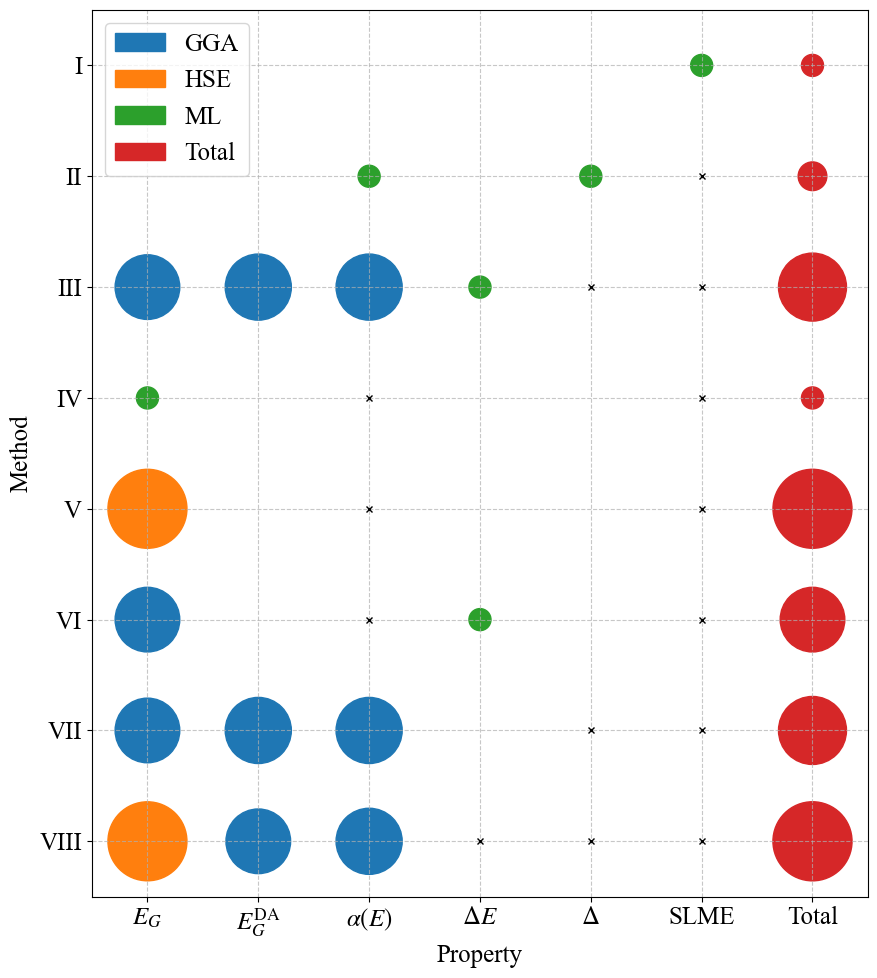

In [14]:
x_labels = [r"$E_G$", r"$E_G^\text{DA}$",r"$\alpha(E)$", r"$\Delta E$", r"$\Delta$","SLME","Total"]
y_labels = ["I", "II", "III","IV","V","VI","VII","VIII"]
x_label = "Property"
y_label = "Method"
max_size = 0.5
figsize = (10,10)
marker_size = 5
marker_width = 1
alpha=1
fontsize = 18
fig, ax = plot_array_data(data_2, categories, 'Relative carbon cost of different methods', x_labels, y_labels,x_label,y_label,max_circle_size=0.4,figsize = figsize,fontsize=fontsize, marker_size=marker_size, marker_width=marker_width,alpha=alpha)
plt.show()
fig.savefig('Methods_plot.pdf', bbox_inches='tight')
fig.savefig('Methods_plot.svg', bbox_inches='tight')

In [15]:
cat_df = pd.DataFrame(categories)
cat_df.to_csv('categories.csv', index=False, header=x_labels)

In [16]:
#data rows
raw_data = categories.copy()
raw_data[0][5] = times_dict["ML"]
raw_data[0][-1] = times_dict["ML"]
raw_data[1][2] = times_dict["ML"]
raw_data[1][4] = times_dict["ML"]
raw_data[1][-1] = 2 * times_dict["ML"]
raw_data[2][0] = times_dict["GGA bands"]
raw_data[2][1] = times_dict["GGA optics"]
raw_data[2][2] = times_dict["GGA optics"]
raw_data[2][3] = times_dict["ML"]
raw_data[2][-1] = times_dict["GGA bands"] + times_dict["GGA optics"] + times_dict["ML"]
raw_data[3][0] = times_dict["ML"]
raw_data[3][-1] = times_dict["ML"]
raw_data[4][0] = times_dict["HSE bands"]
raw_data[4][-1] = times_dict["HSE bands"]
raw_data[5][0] = times_dict["GGA bands"]
raw_data[5][3] = times_dict["ML"]
raw_data[5][-1] = times_dict["GGA bands"] + times_dict["ML"]
raw_data[6][0] = times_dict["GGA bands"]
raw_data[6][1] = times_dict["GGA optics"]
raw_data[6][2] = times_dict["GGA optics"]
raw_data[6][-1] = times_dict["GGA bands"] + times_dict["GGA optics"]
raw_data[7][0] = times_dict["HSE bands"]
raw_data[7][1] = times_dict["GGA bands"]
raw_data[7][2] = times_dict["GGA optics"]
raw_data[7][-1] = times_dict["HSE bands"] + times_dict["GGA bands"] + times_dict["GGA optics"]

In [17]:
method_list = np.array(y_labels)
times_array = np.concatenate((method_list.reshape(-1,1),raw_data), axis=1)

In [18]:
times_array

array([['I', None, None, None, None, None, 0.018581, 0.018581],
       ['II', None, None, 0.018581, None, 0.018581, True, 0.037162],
       ['III', 37.16938461538461, 55.148615384615404, 55.148615384615404,
        0.018581, True, True, 92.33658100000001],
       ['IV', 0.018581, None, True, None, None, True, 0.018581],
       ['V', 2583.5316923076916, None, True, None, None, True,
        2583.5316923076916],
       ['VI', 37.16938461538461, None, True, 0.018581, None, True,
        37.187965615384606],
       ['VII', 37.16938461538461, 55.148615384615404, 55.148615384615404,
        None, True, True, 92.31800000000001],
       ['VIII', 2583.5316923076916, 37.16938461538461,
        55.148615384615404, True, True, True, 2675.8496923076914]],
      dtype=object)

In [19]:
method_time_dict = {r[0]:r[-1] for r in times_array}

In [20]:
dumpjson(method_time_dict, 'method_times.json')

In [21]:
method_time_dict

{'I': 0.018581,
 'II': 0.037162,
 'III': 92.33658100000001,
 'IV': 0.018581,
 'V': 2583.5316923076916,
 'VI': 37.187965615384606,
 'VII': 92.31800000000001,
 'VIII': 2675.8496923076914}